In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import glob 
import warnings
import cv2 
import random
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
warnings.filterwarnings("ignore")
plt.style.use(["science","notebook","grid"])

In [2]:
dataset=glob.glob("E:/pnemonia/*/*/*.jpeg")
len(dataset)

5856

Vizalizing the three different types of images
<br>
1.Normal
<br>
2.Virus affeted lungs 
<br>
3.Bacteria affected lungs 

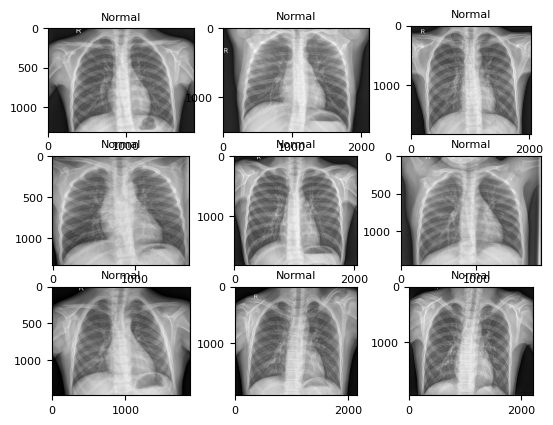

In [3]:
## noram files
normal=[file for file in dataset if "normal" in file.split('\\')]
normal_files=normal[0:9]
font3 = {'size':8}
for idx,img in enumerate(normal[0:9],start=1):
    img_array=cv2.imread(img)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,idx)
    plt.title("Normal",fontdict=font3)
    plt.imshow(img_array)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show
         

In [4]:
virus_affected=[file for file in dataset if "virus" in file.split("\\")[3].split("_")]

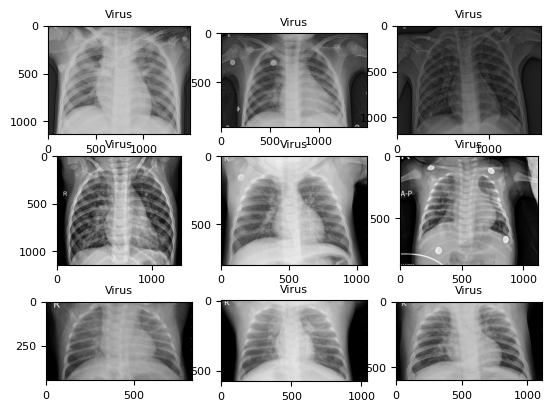

In [5]:
## virus affected files 
virus=virus_affected[0:9]
font={"size":8}
for idx,img in enumerate(virus,start=1):
    img_array=cv2.imread(img)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,idx)
    plt.title("Virus",fontdict=font3)
    plt.imshow(img_array)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show 

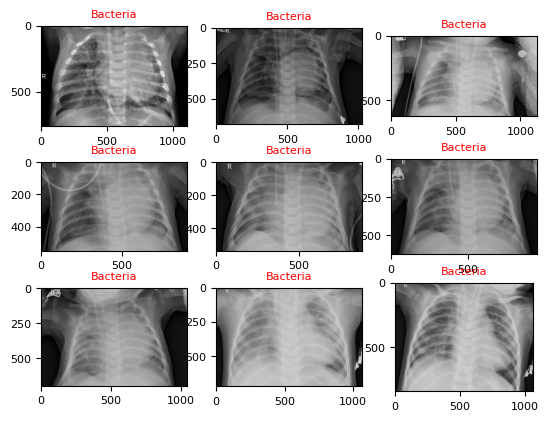

In [6]:
bacteria_affected=[file for file in dataset if "bacteria" in file.split('\\')[3].split('_')]
len(bacteria_affected)
font={"size":8,"color":"red"}
for idx,value in enumerate(bacteria_affected[0:9],start=1):
    img_array=cv2.imread(value)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,idx)
    plt.title("Bacteria",fontdict=font)
    plt.imshow(img_array)
    plt.xticks(fontsize=8) 
    plt.yticks(fontsize=8) 


In [90]:
def normal_files(data):
    global normal
    normal=[]
    for file in data:
        split_file=file.split("\\")
        if "normal" in split_file:
            img_array=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            img_array=cv2.resize(img_array,(150,150))##for using in vgg16 or vgg19 
            normal.append([img_array,"Normal"])
    return normal        

normal_files(dataset)  

[[array([[36, 32, 32, ..., 32, 35, 33],
         [30, 30, 30, ..., 30, 29, 31],
         [34, 32, 32, ..., 32, 32, 32],
         ...,
         [31, 27, 29, ..., 30, 33, 35],
         [30, 29, 26, ..., 34, 34, 32],
         [29, 28, 29, ..., 31, 29, 36]], dtype=uint8),
  'Normal'],
 [array([[ 35,  32,  26, ..., 124, 115, 107],
         [ 40,  31,  27, ..., 120, 117, 104],
         [ 39,  34,  27, ..., 122, 118, 104],
         ...,
         [ 43,  38,  44, ...,  30,  36,  30],
         [ 40,  42,  43, ...,  34,  32,  34],
         [ 40,  38,  41, ...,  33,  33,  30]], dtype=uint8),
  'Normal'],
 [array([[38, 35, 34, ..., 31, 29, 29],
         [36, 37, 35, ..., 32, 30, 32],
         [38, 34, 36, ..., 28, 30, 30],
         ...,
         [31, 28, 27, ..., 35, 29, 32],
         [32, 28, 26, ..., 33, 35, 37],
         [32, 27, 27, ..., 33, 37, 34]], dtype=uint8),
  'Normal'],
 [array([[ 73,  80,  78, ..., 128, 150, 181],
         [ 83,  82,  82, ..., 128, 149, 178],
         [ 79,  84,  83, .

In [91]:
def virus_files(data):
    global viral
    viral=[]
    for file in data:
        split_file=file.split('\\')[3].split("_")
        if "virus" in split_file:
            img_array=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            new_img_array=cv2.resize(img_array,(150,150))
            viral.append([new_img_array,"Viral"])
    return viral  


In [92]:
virus_files(dataset)


[[array([[ 65,  96, 110, ...,  28,  32,  32],
         [ 96, 104, 114, ...,  32,  30,  29],
         [109, 112, 114, ...,  24,  23,  27],
         ...,
         [ 42,  42,  42, ...,  40,  40,  40],
         [ 42,  42,  42, ...,  40,  40,  40],
         [ 42,  42,  40, ...,  40,  40,  40]], dtype=uint8),
  'Viral'],
 [array([[25, 20, 21, ..., 26,  9, 11],
         [22, 19, 19, ..., 40, 33, 13],
         [20, 18, 19, ..., 42, 40, 35],
         ...,
         [30, 29, 31, ..., 35, 36, 33],
         [30, 28, 33, ..., 34, 36, 34],
         [29, 29, 35, ..., 30, 35, 35]], dtype=uint8),
  'Viral'],
 [array([[31, 31, 31, ..., 12,  7,  5],
         [31, 31, 31, ..., 21, 16, 15],
         [30, 30, 30, ..., 30, 22, 22],
         ...,
         [35, 35, 34, ..., 31, 30, 30],
         [35, 35, 34, ..., 31, 31, 30],
         [35, 35, 34, ..., 31, 31, 31]], dtype=uint8),
  'Viral'],
 [array([[ 0, 34, 38, ..., 37, 29,  4],
         [ 0, 22, 31, ..., 37, 23,  0],
         [ 0, 15, 27, ..., 38,  6,  0],
 

In [93]:
def bacteria_files(data):
    global bacteria
    bacteria=[]
    for file in data:
        split_file=file.split("\\")[3].split("_")
        if "bacteria" in split_file:
            img_array=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
            new_img_array=cv2.resize(img_array,(150,150))
            bacteria.append([new_img_array,"Bacterial"])
    return bacteria        
        

In [94]:
bacteria_files(dataset)

[[array([[18, 16, 30, ..., 90, 83, 89],
         [17, 18, 30, ..., 95, 91, 82],
         [16, 15, 24, ..., 97, 86, 76],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
  'Bacterial'],
 [array([[ 43,  40, 155, ...,  35,  41,  52],
         [155, 176, 168, ...,  68,  44,  27],
         [174, 174, 171, ..., 103,  45,  31],
         ...,
         [ 60,  33,  19, ...,  13,  10,  30],
         [ 64,  32,  19, ...,  11,  11,  22],
         [ 64,  33,  19, ...,  11,  22,  29]], dtype=uint8),
  'Bacterial'],
 [array([[173, 178, 178, ..., 201, 197, 203],
         [169, 185, 176, ..., 195, 200, 205],
         [173, 174, 173, ..., 205, 198, 206],
         ...,
         [108,  17,  23, ...,  71, 128, 121],
         [ 84,  17,  22, ...,  95,  79, 124],
         [ 86,  18,  22, ...,  93, 123,  91]], dtype=uint8),
  'Bacterial'],
 [array([[38, 41, 45, ..., 52, 53, 48],
         [41, 43, 46, ..., 43, 51

Merging all datasets 

In [95]:
array_dataset=viral+normal+bacteria
array_dataset[0][0].shape

(150, 150)

In [96]:
len(array_dataset)

5856

In [97]:
random.shuffle(array_dataset)

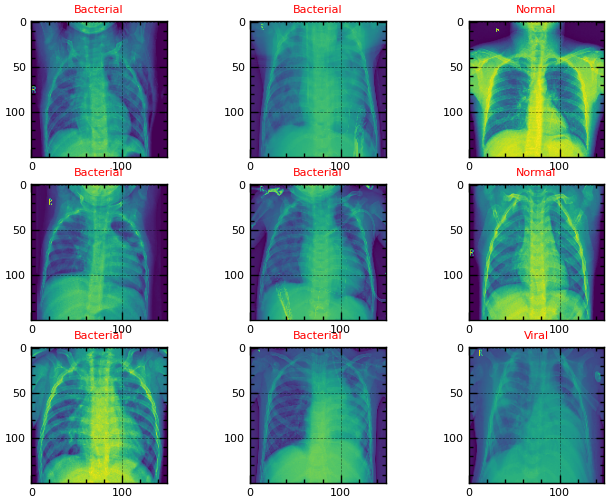

In [98]:
font={"size":8,"color":"red"}
for idx,value in enumerate(array_dataset[0:9],start=1):
    plt.subplot(3,3,idx)
    plt.imshow(value[0]) 
    plt.title(value[1],fontdict=font)
    plt.xticks(fontsize=8) 
    plt.yticks(fontsize=8) 

##### Dividing data into training testing and validation set 

In [99]:
num_val_samples = int(0.15 * len(array_dataset))
num_train_samples = len(array_dataset) - 2 * num_val_samples
train_pairs = array_dataset[:num_train_samples]
val_pairs = array_dataset[num_train_samples : num_train_samples + num_val_samples]
test_pairs = array_dataset[num_train_samples + num_val_samples :]

print(f"{len(array_dataset)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")

5856 total pairs
4100 training pairs
878 validation pairs
878 test pairs


In [100]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for features,label in train_pairs:
    x_train.append(features)
    y_train.append(label)
for features,label in test_pairs:
    x_test.append(features)
    y_test.append(label)

In [101]:
x_train

[array([[16, 23, 25, ...,  0,  0,  0],
        [15, 21, 26, ...,  0,  0,  0],
        [10, 19, 27, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[ 79,  79,  81, ..., 116, 114, 112],
        [ 78,  79,  81, ..., 116, 114, 114],
        [ 81,  75,  80, ..., 117, 118, 119],
        ...,
        [ 79,  35,  18, ...,  20,  27,  24],
        [ 81,  50,  18, ...,  21,  26,  28],
        [ 85,  56,  18, ...,  21,  26,  29]], dtype=uint8),
 array([[4, 4, 4, ..., 6, 6, 4],
        [5, 5, 4, ..., 6, 7, 6],
        [4, 3, 4, ..., 5, 5, 6],
        ...,
        [2, 2, 2, ..., 5, 6, 5],
        [2, 2, 2, ..., 4, 5, 4],
        [2, 2, 2, ..., 4, 4, 5]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dt

In [102]:
x_train = np.array(x_train) / 255

x_test = np.array(x_test) / 255

In [104]:
img_size=150
img_size=150
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
x_train.shape

(4100, 150, 150, 1)

In [105]:
from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder

In [106]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [113]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_30 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout_24 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_31 (Bat  (None, 75, 75, 64)      

In [114]:
labelencoder=LabelEncoder()
y_train=labelencoder.fit_transform(y_train)
y_train
y_test=labelencoder.fit_transform(y_test)
y_test

array([0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1,
       0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0,
       2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1,
       2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2,

In [115]:
mapping_dict={"Noraml":1,"Bacterial":0,"Viral":2}

In [116]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [117]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 3 , validation_data = datagen.flow(x_test, y_test) ,callbacks = [learning_rate_reduction])

Epoch 1/3
129/129 [==============================] - 208s 2s/step - loss: -10.9513 - accuracy: 0.4237 - val_loss: 1.1317 - val_accuracy: 0.4601 - lr: 0.0010
Epoch 2/3
129/129 [==============================] - 202s 2s/step - loss: -99.2602 - accuracy: 0.4339 - val_loss: 1.6491 - val_accuracy: 0.4601 - lr: 0.0010
Epoch 3/3
129/129 [==============================] - 204s 2s/step - loss: -661.4720 - accuracy: 0.4432 - val_loss: 0.9308 - val_accuracy: 0.4829 - lr: 0.0010


###### Train model for more epochs for better accuracy 

In [118]:
x_val=[]
y_val=[]
for feature,label in val_pairs:
    x_val.append(feature)
    y_val.append(label)
x_val = np.array(x_val) / 255
x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)
y_val=labelencoder.fit_transform(y_val)


In [119]:
print("Loss of the model is - " , model.evaluate(x_val,y_val)[0])
print("Accuracy of the model is - " , model.evaluate(x_val,y_val)[1]*100 , "%")

28/28 [==============================] - 13s 452ms/step - loss: 0.9401 - accuracy: 0.4841
Loss of the model is -  0.9401137828826904
28/28 [==============================] - 13s 459ms/step - loss: 0.9401 - accuracy: 0.4841
Accuracy of the model is -  48.405465483665466 %


Train model for model for more epochs for better accuracy 

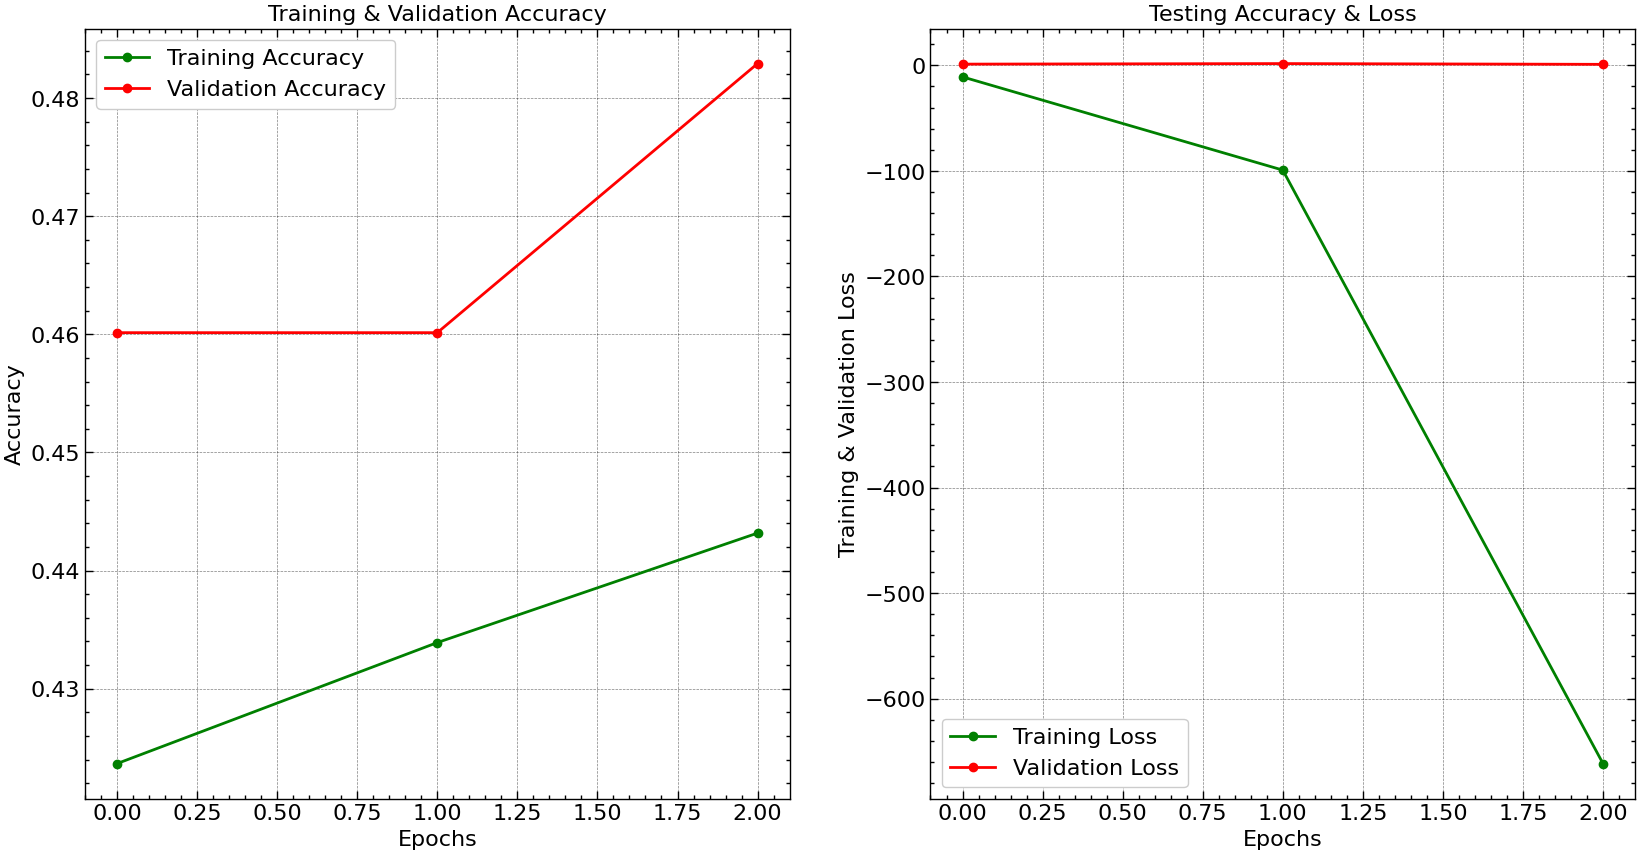

In [120]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [121]:
predictions = model.predict(x_val)
predictions = predictions.reshape(1,-1)[0]
predictions

28/28 [==============================] - 12s 433ms/step


array([0.33556822, 0.2984001 , 0.3904373 , 0.4705338 , 0.50818837,
       0.22119518, 0.39663315, 0.31649905, 0.46163887, 0.44245437,
       0.437414  , 0.20589261, 0.48601902, 0.4745157 , 0.43828744,
       0.34109396, 0.24830158, 0.46559194, 0.38255104, 0.2672761 ,
       0.3896458 , 0.41290826, 0.44858837, 0.42089418, 0.43323645,
       0.25066814, 0.4528357 , 0.46023384, 0.3541137 , 0.1619349 ,
       0.21179906, 0.46777996, 0.4104311 , 0.47854918, 0.35172054,
       0.423561  , 0.40928295, 0.47053108, 0.45040774, 0.40172604,
       0.39074266, 0.4891755 , 0.35512194, 0.12024894, 0.09244086,
       0.23111637, 0.4734721 , 0.42265746, 0.34170172, 0.4260573 ,
       0.37277398, 0.37435117, 0.2824788 , 0.47124824, 0.26823097,
       0.27006754, 0.28158626, 0.26263407, 0.39600492, 0.11677478,
       0.14566745, 0.42837286, 0.44678354, 0.4357313 , 0.4747139 ,
       0.42223406, 0.2045536 , 0.3235808 , 0.36873904, 0.3374832 ,
       0.2729806 , 0.4493763 , 0.4114298 , 0.29789174, 0.46236

0


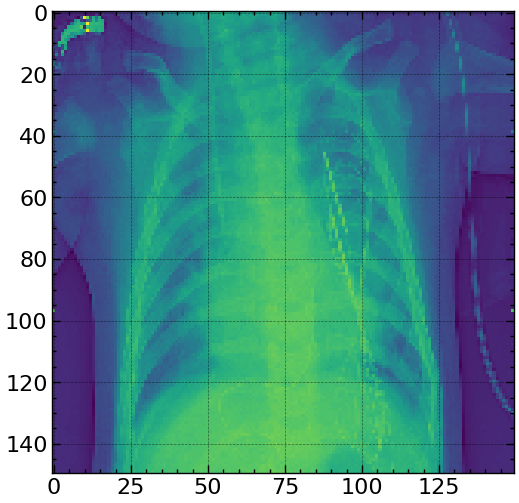

In [122]:
print(y_val[10])
x_val[10]
plt.imshow(x_val[10])

In [123]:
predictions[10]

0.437414